<a href="https://colab.research.google.com/github/andrade-adsf/data_science/blob/master/aceleradev_datascience_june.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os dados

Os dados a seguir fazem parte do desafio de aceleração de *data science* do codenation e foram disponibilizados para todos que se inscreveram para tentar ingressar no curso.

In [0]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

%matplotlib inline

# importar dados
df_test = pd.read_csv("/content/test.csv")
df_train = pd.read_csv("/content/train.csv")

# Analisando o *dataset*

Vamos conhecer nossos dois datasets, nessa etapa é muito importante que a gente entenda as diferenças entre eles.

In [26]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [27]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


A primeira diferença que podemos observar é uma coluna `Unnamed: 0` que serve como index no *dataset* de treino, como já temos nosso index vamos exclui-la.

In [28]:
# excluir a primeira coluna de df_train
df_train = df_train.drop("Unnamed: 0", axis=1)

# visualizando a exclusão da coluna
df_train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


Também conseguimos observar que temos mais colunas no nosso *dataset* de treino do que no *dataset* de teste, vamos dar uma olhada em quantas entradas e variáveis temos em cada um.

In [29]:
print("Entradas e variáveis test:\t", df_test.shape)
print("Entradas e variáveis train:\t", df_train.shape)

Entradas e variáveis test:	 (4576, 47)
Entradas e variáveis train:	 (13730, 166)


# Arrumando os dados de treino

Da froma como os *datasets* estão não conseguiriamos trabalhar com ele, vamos fazer alguns ajustes.

Primeiramente, vamos deixar o df_train com as mesmas colunas que o df_test. Fazendo isso também vamos nos livrar da coluna `NU_NOTA_MT` já que ela é nosso objetivo e portanto não existe no df_test, para ainda usarmos no futuro vou salva-la na variável `target`.

In [0]:
# extrair a coluna nu_nota_mt com as notas das provas de matematica
target = df_train.NU_NOTA_MT.copy()

# igualar as colunas do datasets
for column in df_train.columns:
  if column not in df_test.columns:
    df_train.drop([column], axis=1, inplace=True)

Como ficou nosso *dataset* agora.

In [31]:
# mostrar 5 primeiras entradas
df_train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A


In [32]:
# mostrar 5 primeiras entradas
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


Só para confirmar vamos ver o número de entradas e variáveis mais uma vez e ver o tipo das nossas variáveis pela primeira vez.

In [33]:
# mostrar número de entradas e variáveis em cada dataset
print("Entradas e variáveis de treino:\t", df_train.shape)
print("Entradas e variáveis de teste:\t", df_test.shape, "\n")

# mostrar as colunas e o tipo de dado em cada uma
print("Colunas e tipos, train:\n", df_train.dtypes, "\n")

Entradas e variáveis de treino:	 (13730, 47)
Entradas e variáveis de teste:	 (4576, 47) 

Colunas e tipos, train:
 NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
C

# Há valores faltantes?

df_train:
*   68% dos dados faltando em `TP_ENSINO` e `TP_DEPENDENCIA_ADM_ESC`.
*   53% dos dados faltando em `Q027`.
*   26% dos dados faltando em `TP_STATUS_REDACAO`, `NU_NOTA_COMP4`, `NU_NOTA_LC`, `NU_NOTA_COMP1`, `NU_NOTA_COMP2`, `NU_NOTA_COMP3`, `NU_NOTA_COMP5`, `NU_NOTA_REDACAO`.
*    24% dos dados faltando em `NU_NOTA_CH` e `NU_NOTA_CN`.

In [34]:
# mostrar valores faltantes em cada variável
(df_train.isna().sum() / df_train.shape[0]).sort_values(ascending=False)

TP_ENSINO                 0.688128
TP_DEPENDENCIA_ADM_ESC    0.688128
Q027                      0.536999
TP_STATUS_REDACAO         0.261981
NU_NOTA_COMP4             0.261981
NU_NOTA_LC                0.261981
NU_NOTA_COMP1             0.261981
NU_NOTA_COMP2             0.261981
NU_NOTA_COMP3             0.261981
NU_NOTA_COMP5             0.261981
NU_NOTA_REDACAO           0.261981
NU_NOTA_CH                0.246832
NU_NOTA_CN                0.246832
TP_ANO_CONCLUIU           0.000000
IN_TREINEIRO              0.000000
IN_BAIXA_VISAO            0.000000
IN_CEGUEIRA               0.000000
TP_ESCOLA                 0.000000
IN_SURDEZ                 0.000000
Q047                      0.000000
TP_ST_CONCLUSAO           0.000000
IN_DISCALCULIA            0.000000
TP_NACIONALIDADE          0.000000
TP_COR_RACA               0.000000
TP_SEXO                   0.000000
NU_IDADE                  0.000000
SG_UF_RESIDENCIA          0.000000
CO_UF_RESIDENCIA          0.000000
IN_DISLEXIA         

# Como é a distribuição estatística dos dados?

Os dados estão muito bem trabalhados e praticamente não possuem outliers como podemos observar atráves dos nossos gráficos e do resumo estatístico.

In [35]:
# resumo estatistico
df_train[['NU_IDADE', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_ANO_CONCLUIU']].describe()

,NU_IDADE,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_ANO_CONCLUIU
count,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,21.593809,529.661087,473.495155,516.472841,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,2.146176
std,7.043654,73.726344,71.093674,68.688190,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,3.217328
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,480.400000,419.900000,468.100000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,0.000000
50%,19.000000,532.000000,459.800000,520.900000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,0.000000
75%,23.000000,581.200000,514.500000,564.900000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,3.000000
max,67.000000,807.000000,806.400000,763.600000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,10.000000


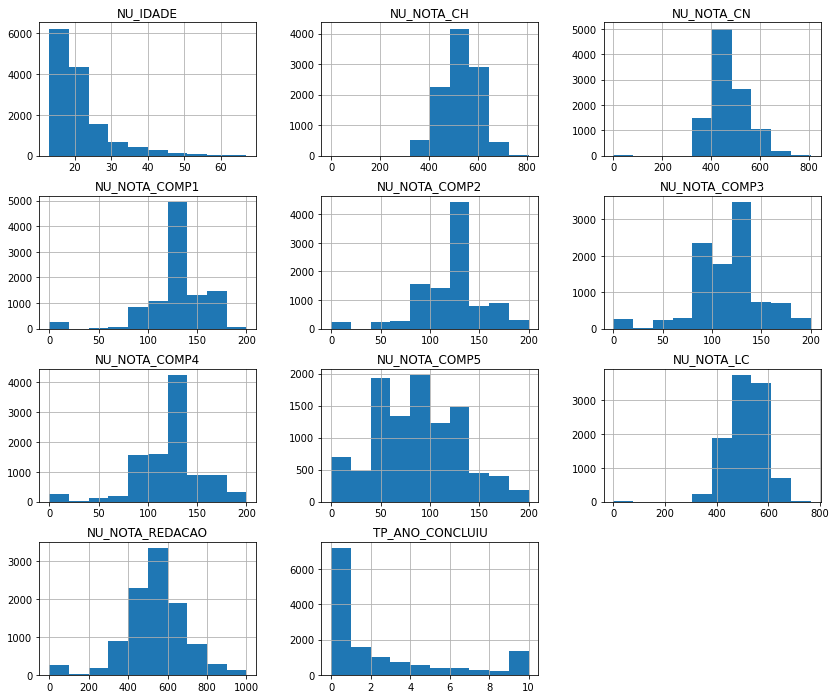

In [36]:
# plotar histogramas
df_train[['NU_IDADE', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_ANO_CONCLUIU']].hist(figsize=(14,12));

## Qual a correlação entre as nossas variáveis?

Para entender como nossos dados se relacionam vamos calcular a correlação entre eles, depois faremos um heatmap para visualizarmos esses dados de forma mais fácil.

Nesse momento faz sentido vermos também como o nosso target, `NU_NOTA_MT`, se relaciona com o restante do *dataset*, por isso vou adiciona-lo novamente à base de dados.

In [37]:
# adicionar NU_NOTA_MT à base de dados
df_train = df_train.join(target)

# salvar as correlações em uma variável corr
corr = df_train.corr()

# mostrar as correlações
display(corr)

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
CO_UF_RESIDENCIA,1.000000,-0.002017,-0.234786,0.009433,0.025822,-0.032538,0.041406,0.018145,-0.034944,0.079229,0.001360,NaN,-0.010716,0.003689,0.001093,-0.029933,-0.009503,-0.014365,-0.035438,-0.035438,-0.034287,0.084534,0.122825,0.128479,-0.096473,-0.016955,0.069195,0.047746,0.050400,0.061881,0.043565,0.060629,0.107493
NU_IDADE,-0.002017,1.000000,0.009675,-0.017713,-0.253403,0.681435,-0.296328,0.516253,-0.295091,-0.082980,0.027907,NaN,0.006520,0.000492,-0.004355,0.004965,0.006482,0.074384,-0.245190,-0.245190,-0.241092,-0.056171,-0.001611,-0.024979,0.082065,0.055675,-0.102243,-0.114181,-0.104293,-0.110452,-0.086709,-0.116125,-0.061485
TP_COR_RACA,-0.234786,0.009675,1.000000,0.015761,0.000738,0.003942,-0.041713,0.040504,0.009676,-0.172229,-0.014715,NaN,0.007852,-0.010046,0.006900,0.017208,-0.010376,0.009759,-0.024471,-0.024471,-0.021861,-0.149429,-0.161831,-0.168624,0.116860,0.020586,-0.097606,-0.090291,-0.096344,-0.102936,-0.091136,-0.107840,-0.157364
TP_NACIONALIDADE,0.009433,-0.017713,0.015761,1.000000,-0.000054,-0.026154,0.024070,0.020522,-0.015179,-0.012981,0.009354,NaN,0.011142,-0.001611,-0.001611,0.012926,-0.005811,-0.002279,-0.020359,-0.020359,-0.024097,-0.039746,-0.049801,-0.049631,0.015266,0.005211,-0.031126,-0.030800,-0.027184,-0.031422,-0.025561,-0.032759,-0.034965
TP_ST_CONCLUSAO,0.025822,-0.253403,0.000738,-0.000054,1.000000,-0.592834,0.156222,NaN,0.533983,NaN,0.018096,NaN,0.013379,-0.007585,0.002106,-0.022877,-0.008536,-0.010727,0.054831,0.054831,0.053252,-0.111134,-0.139415,-0.117616,-0.025174,0.037078,-0.105647,-0.110186,-0.114245,-0.117711,-0.089861,-0.120580,-0.087869
TP_ANO_CONCLUIU,-0.032538,0.681435,0.003942,-0.026154,-0.592834,1.000000,-0.422308,NaN,-0.257710,NaN,-0.000956,NaN,-0.011546,0.004918,-0.005693,0.011686,0.008906,0.023838,-0.216379,-0.216379,-0.216059,0.040447,0.088827,0.077917,0.061881,0.005578,0.027881,0.006023,0.011259,0.022018,0.003954,0.015097,0.029039
TP_ESCOLA,0.041406,-0.296328,-0.041713,0.024070,0.156222,-0.422308,1.000000,-0.047195,-0.244562,0.975328,-0.007455,NaN,0.001588,-0.005403,0.025162,-0.008016,-0.011008,-0.007641,0.173854,0.173854,0.177822,0.083383,0.052710,0.037254,-0.070008,-0.026380,0.059108,0.084441,0.079996,0.068909,0.071172,0.082520,0.069304
TP_ENSINO,0.018145,0.516253,0.040504,0.020522,NaN,NaN,-0.047195,1.000000,NaN,-0.037207,0.017366,NaN,0.050508,NaN,0.022195,0.052293,0.031392,NaN,-0.182264,-0.182264,-0.194518,-0.100504,-0.085401,-0.092792,0.018257,0.040453,-0.088155,-0.115773,-0.107252,-0.114830,-0.103573,-0.119816,-0.086353
IN_TREINEIRO,-0.034944,-0.295091,0.009676,-0.015179,0.533983,-0.257710,-0.244562,NaN,1.000000,NaN,-0.013602,NaN,-0.007374,-0.003297,-0.003297,0.003824,-0.011893,-0.004663,0.094692,0.094692,0.092454,-0.037874,-0.053460,-0.028261,-0.036395,0.006688,-0.008709,-0.023308,-0.030147,-0.025958,-0.025811,-0.026328,-0.022287
TP_DEPENDENCIA_ADM_ESC,0.079229,-0.082980,-0.172229,-0.012981,NaN,NaN,0.975328,-0.037207,NaN,1.000000,-0.033257,NaN,-0.023510,NaN,0.038079,0.002384,-0.008037,NaN,0.096449,0.096449,0.099585,0.393774,0.338486,0.299387,-0.165051,-0.049705,0.233368,0.282586,0.282997,0.264291,0.252388,0.297040,0.373233


Já que nosso objetivo é descobrir a coluna `NU_NOTA_MT` vamos observar com quais colunas ela tem maior correlação, são elas:

*    `NU_NOTA_REDACAO`
*    `NU_NOTA_COMP1`
*    `NU_NOTA_COMP2`
*    `NU_NOTA_COMP3`
*    `NU_NOTA_COMP4`
*    `NU_NOTA_COMP5`
*    `TP_LINGUA`
*    `NU_NOTA_LC`
*    `NU_NOTA_CH`
*    `NU_NOTA_CN`
*    `TP_DEPENDENCIA_ADM_ESC`
*    `TP_COR_RACA`
*    `CO_UF_RESIDENCIA`

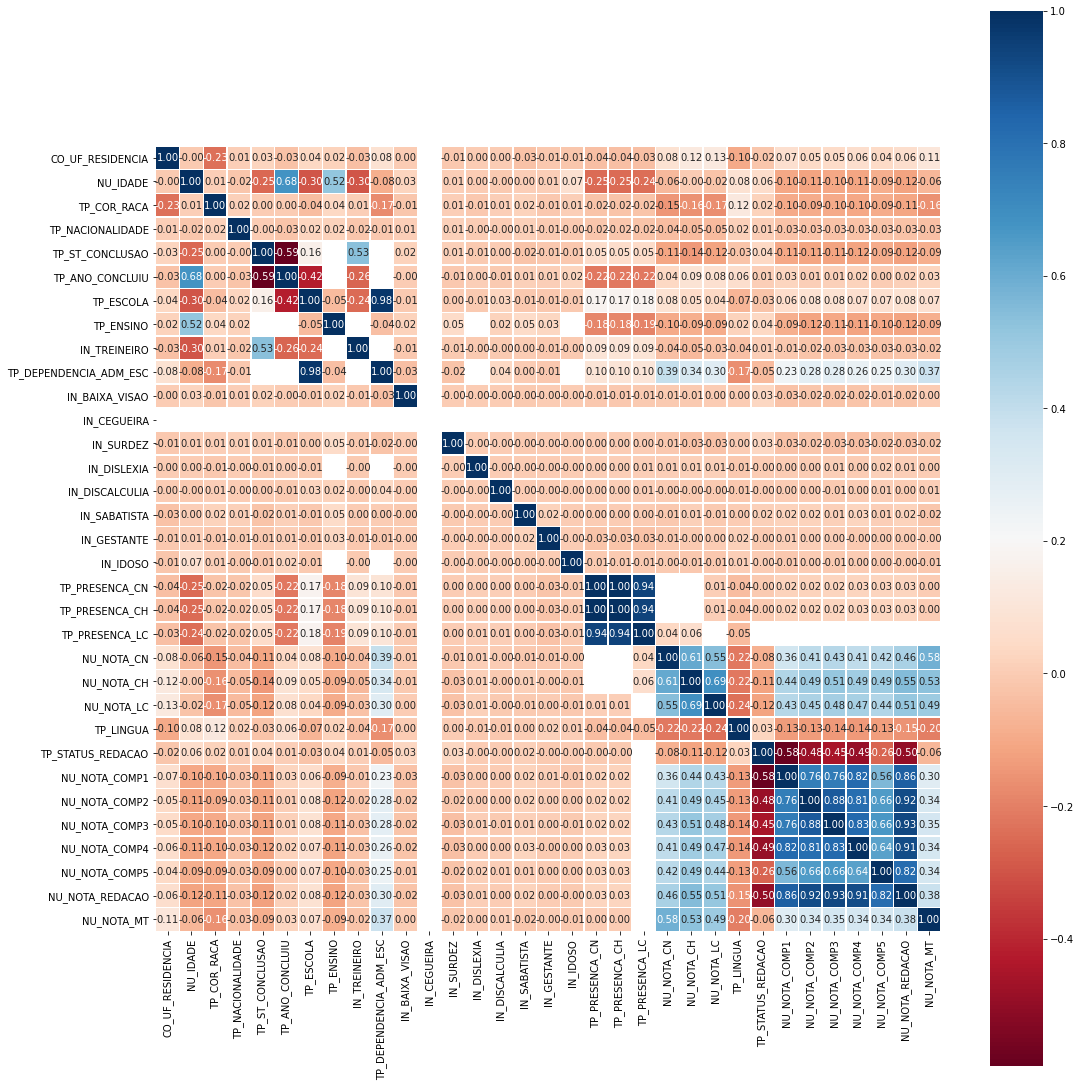

In [38]:
# plotar o heatmap
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr, fmt='.2f', square=True, annot=True, ax=ax, cmap='RdBu', linecolor='white', linewidths=0.5)

plt.tight_layout();

# Preparando os dados para o teste

Já observamos os dados de teste, identificamos onde há valores nulos e com o gráfico de correlação entendemos quais variávies são importantes para resolver nosso problema.

Agora vamos juntar nossos dados e trabalha-los levando tudo isso em consideração. Novamente, como não temos coluna `NU_NOTA_MT` no *dataset* de treino, vou substituir todos os seus valores NaN - correspondentes à Alunos que não compareceram a prova portanto tiraram 0 - por 0, e salva-la novamente na variável `target`.

In [39]:
# preencher valores NaN com 0
df_train['NU_NOTA_MT'].fillna(0, axis=0, inplace=True)

# salvar index
train_idx = df_train.shape[0]
test_idx = df_test.shape[0]

# salvar NU_INSCRICAO para submissao ao codenation
nu_inscricao = df_test['NU_INSCRICAO']

# extrair coluna NU_NOTA_MT do dataset treino e exclui-la
target = df_train.NU_NOTA_MT.copy()
df_train.drop(['NU_NOTA_MT'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

print("df_merged.shape:\t", df_merged.shape)

df_merged.shape:	 (18306, 47)


## Excluindo colunas

Algumas colunas não são importantes para atingir nosso resultado, seja porque tem muitos dados faltantes e não conseguimos substitui-los sem enviesar o *dataset* ou simplesmente porque não são importantes para a análise.

In [0]:
# excluir colunas
df_merged.drop(['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_CEGUEIRA', 'NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'CO_PROVA_CN', 'CO_PROVA_CH',
                'CO_PROVA_LC', 'CO_PROVA_MT', 'Q027'], axis=1, inplace=True)

## Tratando os dados NaN

Dentre as colunas que decidimos usar que possuem dados NaN - não preenchidos - a maioria corresponde à notas de prova, enquanto uma corresponde ao status da redação, todas elas possuem valores em branco pois os alunos não compareceram na prova.

Entendemos que se um aluno não compareceu a nota dele foi 0, por isso substituiremos NaN por 0, no caso do status da redação substituiremos por 4, que é o valor associado à quem entregou a prova em branco.

In [0]:
# substituir valores ausentes por 0
df_merged['NU_NOTA_COMP4'].fillna(0, axis=0, inplace=True)
df_merged['NU_NOTA_LC'].fillna(0, axis=0, inplace=True)
df_merged['NU_NOTA_COMP1'].fillna(0, axis=0, inplace=True)
df_merged['NU_NOTA_COMP2'].fillna(0, axis=0, inplace=True)
df_merged['NU_NOTA_COMP3'].fillna(0, axis=0, inplace=True)
df_merged['NU_NOTA_COMP5'].fillna(0, axis=0, inplace=True)
df_merged['NU_NOTA_REDACAO'].fillna(0, axis=0, inplace=True)
df_merged['NU_NOTA_CH'].fillna(0, axis=0, inplace=True)
df_merged['NU_NOTA_CN'].fillna(0, axis=0, inplace=True)

# substitur valores auxentes por 4
df_merged['TP_STATUS_REDACAO'].fillna(4, axis=0, inplace=True)

## Tratando valores não númericos

Ainda temos 8 colunas com valores não númericos na nossa base, é importante que tenhamos apenas valores númericos para os cálculos que serão feitos para prever nosso objetivo.

Para a variável `TP_SEXO` vamos substituir o valor M por 0 e o valor F por 1.

Enquanto que para as questões socioeconômicas criaremos variáveis para cada uma das respostas disponíveis, e preenchemos a correta com 1 e as outras com 0, chamamos isso de *dummies*.

Em seguida também veremos como nosso *dataset* ficou após todas essas alterações.

In [42]:
# converter TP_SEXO em 0 e 1
df_merged['TP_SEXO'] = df_merged['TP_SEXO'].map({'M': 0, 'F':1})

# dummie variables para Q001, Q002, Q006, Q024, Q025, Q026, Q027, Q047
Q001_dummies = pd.get_dummies(df_merged['Q001'], prefix='Q001')
Q002_dummies = pd.get_dummies(df_merged['Q002'], prefix='Q002')
Q006_dummies = pd.get_dummies(df_merged['Q006'], prefix='Q006')
Q024_dummies = pd.get_dummies(df_merged['Q024'], prefix='Q024')
Q025_dummies = pd.get_dummies(df_merged['Q025'], prefix='Q025')
Q026_dummies = pd.get_dummies(df_merged['Q026'], prefix='Q026')
Q047_dummies = pd.get_dummies(df_merged['Q047'], prefix='Q047')

# adicionar dummies ao dataset
df_merged = pd.concat([df_merged, Q001_dummies, Q002_dummies, Q006_dummies, Q024_dummies, Q025_dummies, Q026_dummies, Q047_dummies], axis=1)

# remover as questões originais do dataset
df_merged.drop('Q001', axis=1, inplace=True)
df_merged.drop('Q002', axis=1, inplace=True)
df_merged.drop('Q006', axis=1, inplace=True)
df_merged.drop('Q024', axis=1, inplace=True)
df_merged.drop('Q025', axis=1, inplace=True)
df_merged.drop('Q026', axis=1, inplace=True)
df_merged.drop('Q047', axis=1, inplace=True)

# mostrar novo dataset
display(df_merged.head())

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,43,24,0,1,1,1,4,1,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,23,17,1,3,1,2,0,2,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,23,21,1,3,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,33,25,1,0,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,13,28,0,2,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0


# Separando nosso dataset em treino e teste novamente

Dados trabalhados, hora de separa-los novamente.

In [0]:
# separar os datasets
df_train = df_merged.iloc[:train_idx]
df_test = df_merged.iloc[train_idx:]

# Treinando nosso modelo

Finalmente usaremos o *daset* de treino para treinar o modelo

In [44]:
x = df_train
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y)

rlm_model = LinearRegression()
rlm_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testando a acurácia baseada no *dataset* de treino

In [45]:
y_pred = rlm_model.predict(x_test)
print("R² Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R² Score:	 0.9148033703652557
MAE:		 47.63634810193066
MSE:		 4436.478178962346
